# Actividad 02: Librerias y modelamiento básico

### Profesor: Juan Marcos Marín Ramírez
#### Métodos Computacionales
---



## 1.
Una persona conduce una moto con rapidez constante $v_m$, mientras que un policia lo hace con aceleración constante $a_p$ (iniciando desde el reposo). Suponga que ambos movimientos inician en $t=0$, haga una gráfica para el movimiento de la moto y del policia, donde el usuario ingrese la velocidad (moto) y aceleración (policia). Además determine el instante $t$ en el cual se encuentran ambos. Ambos movimientos iniciarán en $x_i = 0$

**Pruebe**: para $v_m$ = 15m/s y $a_p$ = 3 m/s², el tiempo deberia ser 10 s


$$x_f = x_i + v_m\cdot t$$

$$x_f = x_i + v_o\cdot t + \frac{1}{2}a_p\cdot t^2$$



Ingrese la velocidad de la moto (m/s): 15
Ingrese la aceleración del policia: (m/s²)3


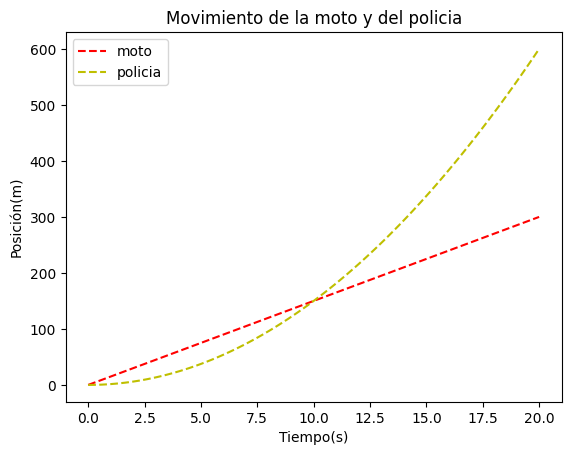

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

v_m = float(input("Ingrese la velocidad de la moto (m/s): ")) #Le pedimos al usuario que ingrese la velocidad y la aceleración de la moto y del policia
a_p = float(input("Ingrese la aceleración del policia: (m/s²)"))

t=np.linspace(0,20,100) #Este arreglo representa el tiempo, crea un arreglo desde 0 y hasta 20 con 100 puntos equidistantes entre ellos

x_moto = v_m*t
y_policia = 0.5*(a_p*t**2) #Calcula la posición de cada uno en un tiempo t

plt.plot(t, x_moto,'r--' ,label='moto') #Grafica la posición de la moto contra el tiempo
plt.plot(t, y_policia,'y--', label='policia')
plt.title('Movimiento de la moto y del policia')
plt.xlabel('Tiempo(s)')
plt.ylabel('Posición(m)')
plt.legend()
plt.show()


In [ ]:
## para  vm  = 15m/s y  ap  = 3 m/s², el tiempo deberia ser 10 s

v_m=15
a_p=3

t_encuentro = 2*(v_m/a_p) #Formula reflejada luego de igual las dos ecuaciones dads en el ejercicio

print(f"El tiempo en el cual se encuentran ambos es de {t_encuentro} segundos")

El tiempo en el cual se encuentran ambos es de 10.0 segundos


---

##2.
El potencial Lennard-Jones es un modelo simple que aproxima la interacción entre un par de moléculas neutras. Este está definido como:

$$
V(r) = 4\epsilon \left[ \left( \frac{\sigma}{r} \right)^{12} - \left( \frac{\sigma}{r} \right)^{6} \right]
$$

Donde:
- $V(r)$ es el potencial en función de la distancia interatómica $r$.
- $\epsilon$ es la profundidad del pozo de potencial, es decir, la energía mínima que describe la interacción entre dos partículas.
- $\sigma$ es la distancia a la cual el potencial es cero, también conocido como el parámetro de distancia.
- $r$ es la distancia entre las dos partículas.

a. Escriba una función para encontrar modelar el potencial LJ.


b. Usando $\sigma = \epsilon = 1$ demuestre que la distancia de equilibrio $r_m$ es aproximadamente $r_m = 2^{1/16}\sigma$. Para esto realice un gráfico del potencial, especificando los ejes. Trunque la serie en $r_c = 2.5\sigma$.


c. Verifique que $r_m = 2^{1/16}\sigma$ se cumple para diferentes valores de $\sigma$, dejando $\epsilon$ constante.




In [18]:
#a
import numpy as np
import matplotlib.pyplot as plt
def Potencial_LJ(r, epsilon, sigma):
  #Calcula el potencial V(r) para un r, un epsilón y un sigma
  return 4*epsilon*(((sigma/r)**12)-(sigma/r)**6)

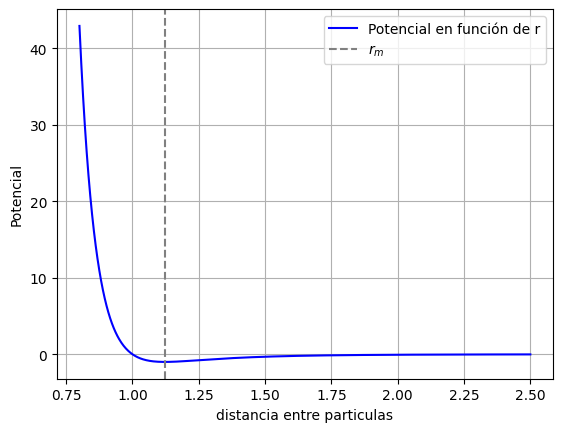

In [24]:
#b
r = np.linspace(0.8, 2.5, 1000)
epsilon = 1
sigma = 1
Vr = Potencial_LJ(r, epsilon, sigma)
rm = r[np.argmin(Vr)]
plt.plot(r, Vr, label =r'Potencial en función de r', color= 'blue')
plt.axvline(rm, label = '$r_m$', color= 'grey', linestyle = '--')
plt.xlabel('distancia entre particulas')
plt.ylabel('Potencial')
plt.grid()
plt.legend()

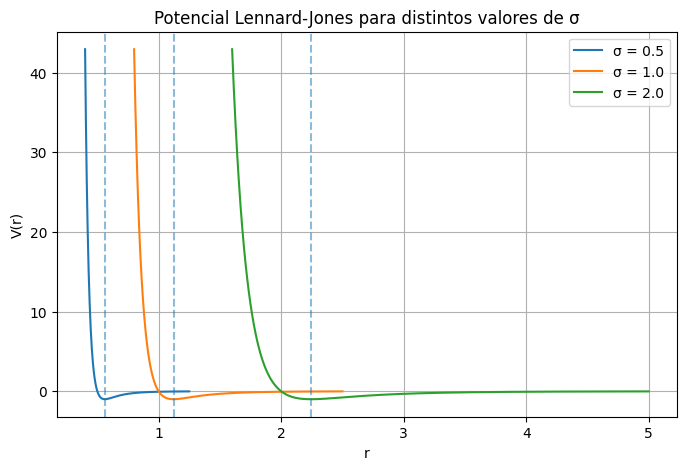

In [22]:
#c
sigmas = [0.5, 1.0, 2.0]
epsilon = 1

plt.figure(figsize=(8, 5))

for sigma in sigmas:
    r_c = 2.5 * sigma
    r = np.linspace(0.8 * sigma, r_c, 500)
    V = Potencial_LJ(r, epsilon, sigma)
    r_min_teorica = 2 ** (1/6) * sigma
    plt.plot(r, V, label=f'σ = {sigma}')
    plt.axvline(r_min_teorica, linestyle='--', alpha=0.5)

plt.title('Potencial Lennard-Jones para distintos valores de σ')
plt.xlabel('r')
plt.ylabel('V(r)')
plt.legend()
plt.grid(True)
plt.show()

##3.  
El siguiente código exporta tablas html de sitios web

```python
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]
````

El primer dataset muestra las alturas medias de niñ@s de 5, 10, 15 y 19 años.

a. Limpie los datos, eliminando columnas en *(in)* y cambie todos los nombres de las columnas al español.

b. Realice un gráfico de barras, donde se muestre una comparación de la estatura media para niños y niñas en ambas categorias. Esto para los primeros 10 paises con mayor y menor altura, además agregue a Colombia.

c. ¿Existirá una relación entre la riqueza y la altura? Usando el dataset `income`, haga un merge con el dataset `alturas`. Ahora, empleando los datos de altura para los 10 mayores (19 años) y 10 menores (19 años). Realice un gráfico donde relacione la altura media con el GDP y concluya si existe alguna relación.


In [3]:
import pandas as pd

# Dataset 1
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-height-by-country"

# Read the HTML content
html_content = pd.read_html(url)

alturas = html_content[2]

# Dataset 2
# URL of the webpage
url = "https://worldpopulationreview.com/country-rankings/average-net-worth-by-country"

# Read the HTML content
html_content = pd.read_html(url)

income = html_content[0]

In [11]:
alturas = alturas.rename(columns={
    "Country": "País",
    "Average Height, Boys, 19 yo (cm)": "Altura niños 19 años (cm)",
    "Average Height, Girls, 19 yo (cm)": "Altura niñas 19 años (cm)"
})
alturas

,País,Altura niños 19 años (cm)
0,Timor-Leste,160
1,Laos,163
2,Solomon Islands,163
3,Papua New Guinea,163
4,Mozambique,164
5,Nepal,164
6,Guatemala,164
7,Yemen,164
8,Bangladesh,165
9,Madagascar,165


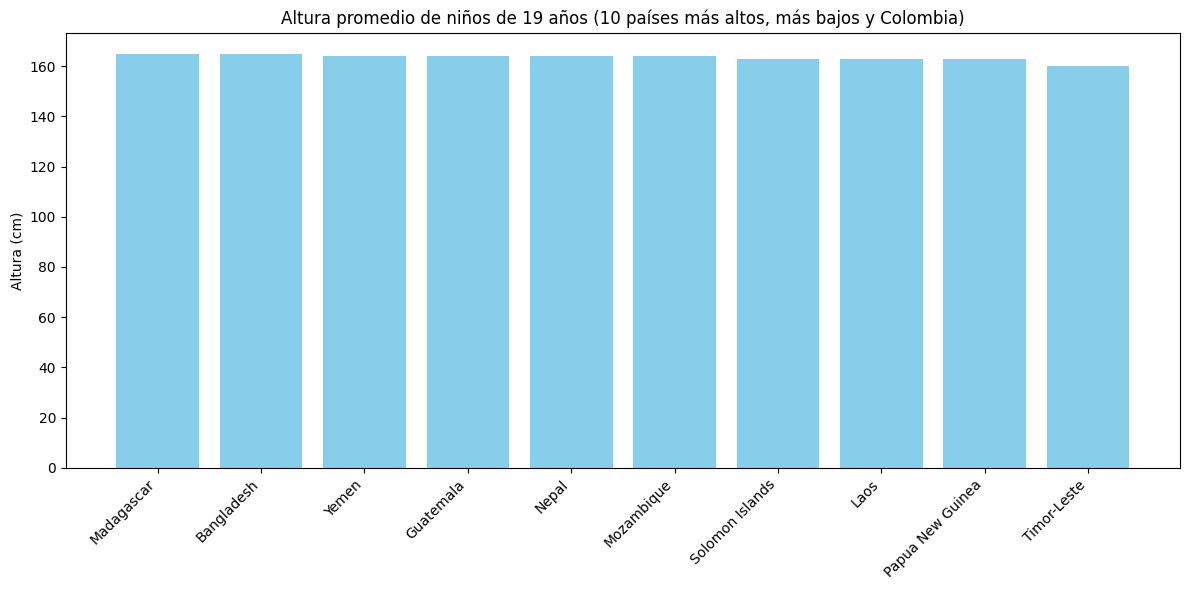

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Ordenar para sacar los 10 más altos y más bajos
altos = alturas.sort_values("Altura niños 19 años (cm)", ascending=False).head(10)
bajos = alturas.sort_values("Altura niños 19 años (cm)").head(10)

# Filtrar Colombia si está
colombia = alturas[alturas["País"] == "Colombia"]

# Unir los tres
df_final = pd.concat([altos, bajos, colombia]).drop_duplicates()

# Gráfico
plt.figure(figsize=(12,6))
plt.bar(df_final["País"], df_final["Altura niños 19 años (cm)"], color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Altura (cm)")
plt.title("Altura promedio de niños de 19 años (10 países más altos, más bajos y Colombia)")
plt.tight_layout()
plt.show()

In [16]:
# Limpiar columnas de ingreso
income["PIB por adulto (2022)"] = income["PIB por adulto (2022)"].replace('[\$,]', '', regex=True).astype(float)

<ipython-input-16-39fcdad9dc8d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income["PIB por adulto (2022)"] = income["PIB por adulto (2022)"].replace('[\$,]', '', regex=True).astype(float)


In [17]:
# Hacemos el merge por la columna 'País'
merged = pd.merge(alturas, income, on="País")

In [18]:
mayores = merged.sort_values("Altura niños 19 años (cm)", ascending=False).head(10)
menores = merged.sort_values("Altura niños 19 años (cm)").head(10)

# Unir ambos
datos_finales = pd.concat([mayores, menores])

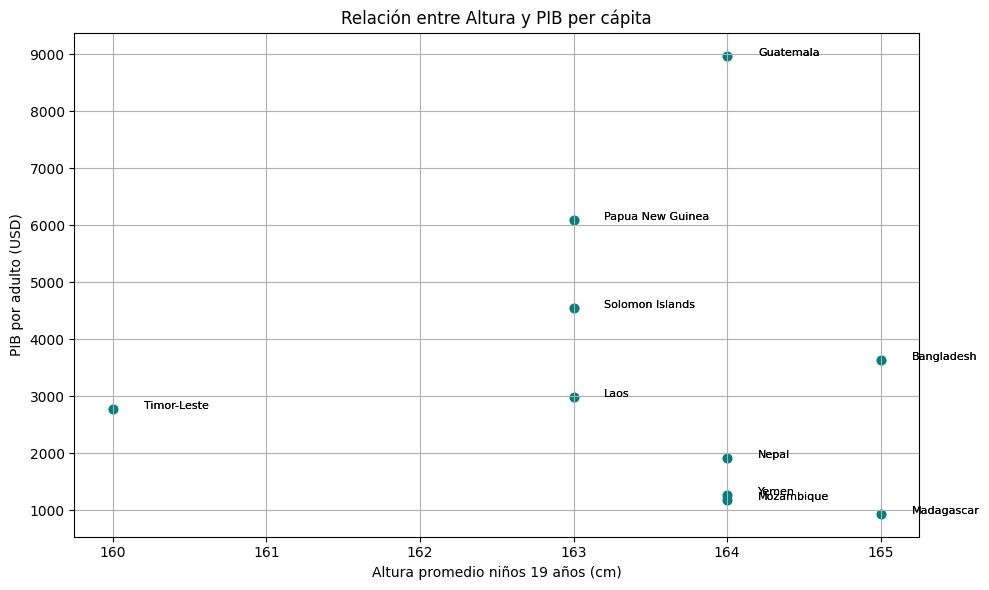

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.scatter(datos_finales["Altura niños 19 años (cm)"], datos_finales["PIB por adulto (2022)"], color='teal')
plt.xlabel("Altura promedio niños 19 años (cm)")
plt.ylabel("PIB por adulto (USD)")
plt.title("Relación entre Altura y PIB per cápita")
plt.grid(True)

# Etiquetas para los países
for i, row in datos_finales.iterrows():
    plt.text(row["Altura niños 19 años (cm)"]+0.2, row["PIB por adulto (2022)"], row["País"], fontsize=8)

plt.tight_layout()
plt.show()